<!-- <font size= 5> -->
# Calculation of Cerenkov light produced from the passage of Proton in LAr using the new Refractive Index data(fit) and Frank-Tamm formula in the vicinity of UV resonant wavelength of 106.6 nm 

In [1]:
#Import necesary modules to run the code
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
   
from matplotlib import rc
import matplotlib

import math
import scipy
from scipy import integrate
from scipy import optimize
from scipy.optimize import fsolve
from numpy import sqrt, sin, cos, pi
import csv
import time

<font size = 5>
    
Refractive index (n): 
    
Grace, Nikkel (2017): (https://arxiv.org/pdf/1502.04213.pdf)
    
Functional form of n is given by, 

$$ n^2 = a_{0} + \frac {a_{UV}\lambda^{2}} {\lambda^{2} - \lambda_{UV}^{2}} + \frac {a_{IR}\lambda^{2}} {\lambda^{2} - \lambda_{IR}^{2}}  $$     


The maximum wavelength for Cerenkov radiation can be obtained from employing the condition for Cerenkov emission, 
    
$$ v > \frac{c}{n}  \equiv  \beta > \frac{1}{n}$$ 
So, $$\beta^2 > \frac{1}{n^2}$$ 
Therefore, $$n^2(\lambda) > \frac{1}{\beta^2}$$
    
    
Now, employing this condition and solving for $n^2$ gives us the max wavelength, 
    
$$ \lambda_{max}  = \sqrt(\frac{a_{0} - \beta^{-2}}{a_{0} - \beta^{-2} + a_{UV}}). \lambda_{UV}  $$
    

    
    
Babics (2020): (https://arxiv.org/pdf/2002.09346.pdf)
    
Refractive index, 
$$n = \sqrt{1 + \frac{3x}{3-x}}$$
    
    where, 
$$ x = a_{0} + \frac {a_{UV}\lambda^{2}} {\lambda^{2} - \lambda_{UV}^{2}} + \frac {a_{IR}\lambda^{2}} {\lambda^{2} - \lambda_{IR}^{2}}$$
    
Resonance wavelength is 106.6 nm. Here, $ a_{0}, a_{UV}, a_{IR} $ are Sellmeier coefficients 

<font size = 5>

Refractive index formula for our new fit, 

$$ n_{PVS} (\lambda) = a_{0} + a_{PVS} (\frac{\lambda_{UV}^{-1} - \lambda^{-1}}{(\lambda_{UV}^{-1} - \lambda^{-1})^2 + \Gamma^2}) $$  
    
where, $a_{0} = 1.18416$ , $a_{pvs} = 0.000325985$ and $\Gamma = 0.000693652$ are the best fit parameters.
    
Now, employing the Cerenkov limit for emission($v > \frac{c}{n}$ i.e $n \geq \frac{1}{\beta}$) requires us to find the solution for $\lambda$ from the inequality relation: 

$$ n_{PVS} (\lambda) = a_{0} + a_{PVS} (\frac{\lambda_{UV}^{-1} - \lambda^{-1}}{(\lambda_{UV}^{-1} - \lambda^{-1})^2 + \Gamma^2}) \geq \frac{1}{\beta} $$  
    
The solution takes the form of a standard quadratic equation's solution and gives us the lower and upper bounds of $\lambda$,
    
$$\lambda = \frac{2\lambda_{UV}(a_0 \beta - 1)}{2(a_0 \beta - 1) + \lambda_{UV} (a_{PVS} \beta \mp \sqrt{a_{PVS}^2 \beta^2 - 4(a_0 \beta - 1)^2 \Gamma^2})}$$

Where, 
    
$$\lambda_{min} = \frac{2\lambda_{UV}(a_0 \beta - 1)}{2(a_0 \beta - 1) + \lambda_{UV} (a_{PVS} \beta - \sqrt{a_{PVS}^2 \beta^2 - 4(a_0 \beta - 1)^2 \Gamma^2})}$$ and 
$$\lambda_{max} = \frac{2\lambda_{UV}(a_0 \beta - 1)}{2(a_0 \beta - 1) + \lambda_{UV} (a_{PVS} \beta + \sqrt{a_{PVS}^2 \beta^2 - 4(a_0 \beta - 1)^2 \Gamma^2})}$$



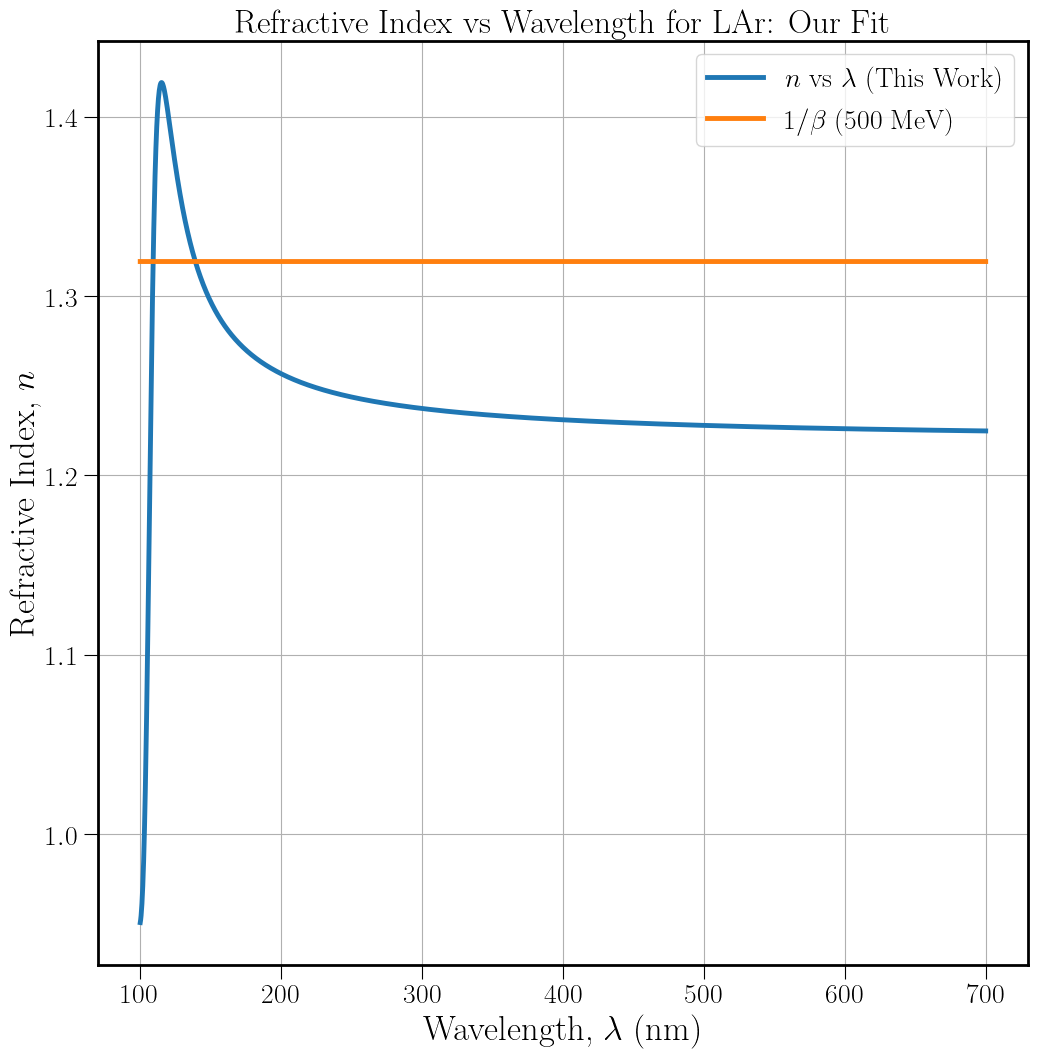

In [3]:
#Refractive index new fit: M. Sievert (Mathematica equivalent)

lamd = np.linspace(100,700,2000)   #wavelength of light 

t = 500 #K.E of Proton  in MeV
mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 



# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))


#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

#Plot of n vs lambda in the LAr medium near Resonance  

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)



ax.set_title("Refractive Index vs Wavelength for LAr: Our Fit", fontsize=24)
ax.plot(lamd, n_pvs, linewidth = 3.5, label="$n$ vs $\lambda$ (This Work)")
ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$ (500 MeV)")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax.set_ylabel('Refractive Index, $n$',fontsize=25)
ax.grid()
ax.legend(fontsize=20)

# plt.savefig("n_vs_lambda_near_resonance_ourfit_P500MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

#Mathematica solution for wavelength bounds: 

{{\[Lambda] -> (-2 \[Lambda]UV + 2 a0 \[Beta] \[Lambda]UV + aPVS \[Beta] \[Lambda]UV^2 - \[Sqrt](aPVS^2 \[Beta]^2 \(\[Lambda]UV^4 - 4 \[CapitalGamma]^2 \[Lambda]UV^4 + 8 a0 \[Beta] \[CapitalGamma]^2 \[Lambda]UV^4 - 4 a0^2 \[Beta]^2 \[CapitalGamma]^2 \[Lambda]UV^4))/(2 (-1 +  a0 \[Beta] + aPVS [Beta] \[Lambda]UV - \[CapitalGamma]^2 \[Lambda]UV^2 + a0 \[Beta] \[CapitalGamma]^2 \[Lambda]UV^2))}, 

{{\[Lambda] -> (-2 \[Lambda]UV + 2 a0 \[Beta] \[Lambda]UV + aPVS \[Beta] \[Lambda]UV^2 + \[Sqrt](aPVS^2 \[Beta]^2 \(\[Lambda]UV^4 - 4 \[CapitalGamma]^2 \[Lambda]UV^4 + 8 a0 \[Beta] \[CapitalGamma]^2 \[Lambda]UV^4 - 4 a0^2 \[Beta]^2 \[CapitalGamma]^2 \[Lambda]UV^4))/(2 (-1 +  a0 \[Beta] + aPVS [Beta] \[Lambda]UV - \[CapitalGamma]^2 \[Lambda]UV^2 + a0 \[Beta] \[CapitalGamma]^2 \[Lambda]UV^2))}, 


Algebraic Method (on Paper): Wavelength_min = 105.9048974518986 nm, Wavelength_max = 58.15481997297611 nm
Algebraic Method (Mathematica): Wavelength_min = 105.90489745189845 nm, Wavelength_max = 58.154819972976135 nm


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in reciprocal
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


0.8750657141671857

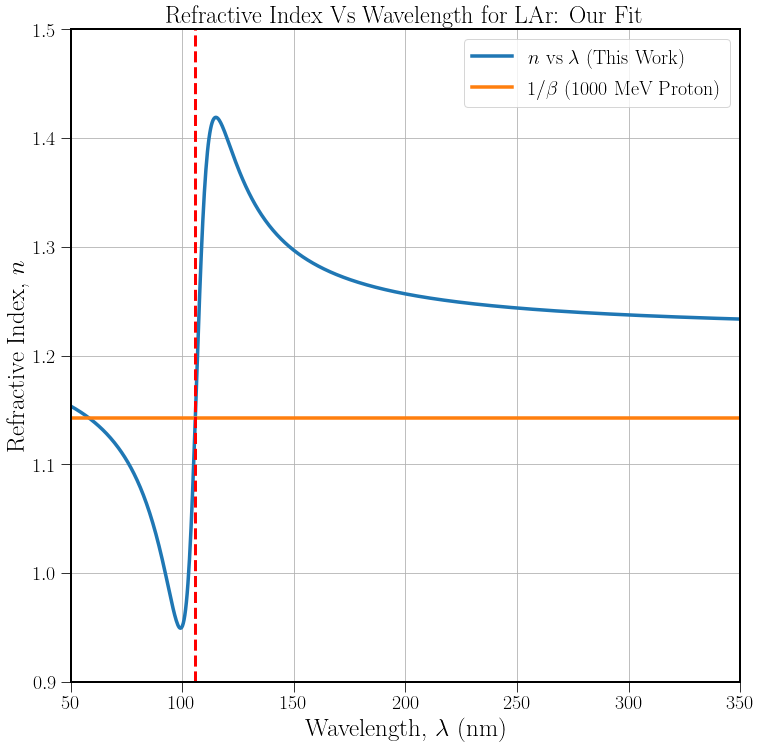

In [4]:
#Refractive index new fit: M. Sievert (Mathematica equivalent)

lamd = np.linspace(0,700,2000)   #wavelength of light 

t = 1000 #K.E of Proton  in MeV
mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 


# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))
lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))
# lamdmax = 500
print("Algebraic Method (on Paper): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

lammin = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 + np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
lammax = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 - np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
print("Algebraic Method (Mathematica): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lammin, lammax))


#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

func = n_pvs - y

# idx = np.argwhere(np.diff(np.sign(func))).flatten()
# print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

# plt.plot(lamd[idx], func[idx], 'ro')
# plt.show()
# print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

# fsolve(f, [106, 150])
# optimize.fixed_point(func, [106, 150])


#Plot of n vs lambda in the LAr medium near Resonance  

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Refractive Index Vs Wavelength for LAr: Our Fit", fontsize=24)
ax.plot(lamd, n_pvs, linewidth = 3.5, label="$n$ vs $\lambda$ (This Work)")
ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$ (1000 MeV Proton)")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax.set_ylabel('Refractive Index, $n$',fontsize=25)
ax.grid()
ax.legend(fontsize=20)
# plt.savefig("n_vs_lambda_near_resonance_ourfit.jpg") #Ctrl+/ to comment in or out 

# lamdmin = 106.6 #UV-Resonant wavelength in nm 
# lamdmax = np.sqrt((a_0 - beta**(-2))/((a_0 - beta**(-2) + a_uv))) * lamd_uv
# plt.axvline(lamdmax, ls='--',c='r',lw=3) #lamdmax
plt.axvline(lamdmin, ls='--',c='r',lw=3) #lamdmin


# print("K.E(T) = {} MeV, beta = {:.2f}, wavelength_min = {} nm,  wavelength_max = {:.1f} nm, n = {:.2f}".format(t,beta,lamdmin,lamdmax,n_pvs[index]))
# print("wavelength = {:.1f} nm, n^2 = {}".format(wavelength,n2_babics[index]))

plt.ylim([0.9, 1.5])
plt.xlim([50,350])

# plt.savefig("n_vs_lambda_near_resonance_ourfit_P1000MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

beta

Algebraic Method (on Paper): Wavelength_min = 107.20482450892213 nm, Wavelength_max = 3453.3421068189728 nm
Algebraic Method (Mathematica): Wavelength_min = 107.20482450892429 nm, Wavelength_max = 3453.3421068189814 nm
Numerical Method: Wavelength_min = 0.0 nm, Wavelength_max = 107.1535767883942 nm


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in reciprocal
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sign


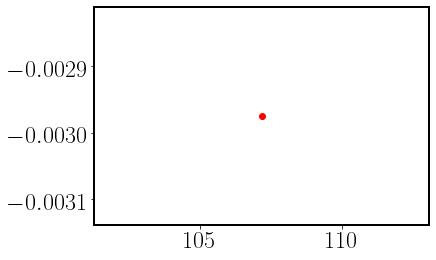

Wavelength_min = 0.0 nm, Wavelength_max = 107.1535767883942 nm


0.8198002603953367

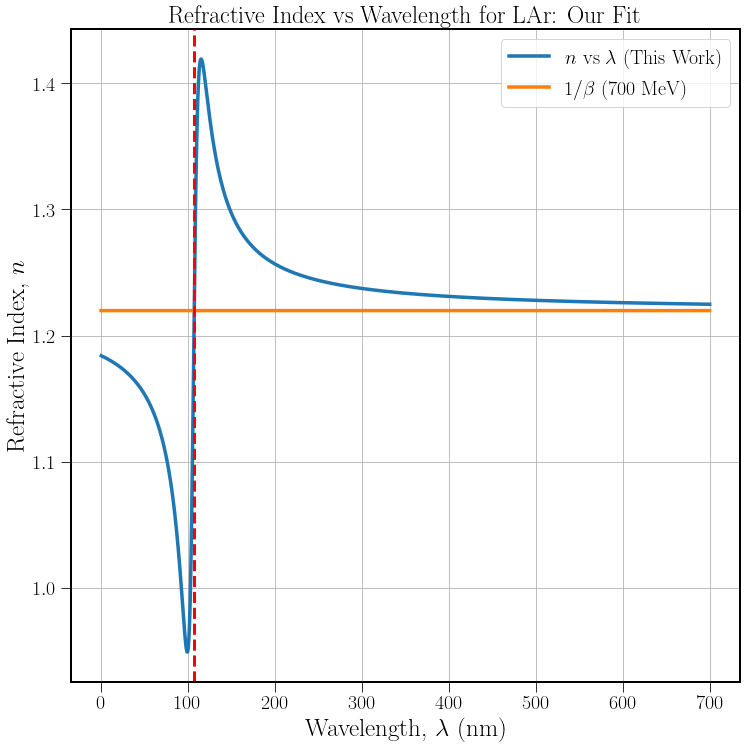

In [5]:
t = 700 #K.E of Proton  in MeV
#Plot of n vs lambda in the LAr medium near Resonance  

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 


# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))
lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))

print("Algebraic Method (on Paper): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

lammin = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 + np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
lammax = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 - np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
print("Algebraic Method (Mathematica): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lammin, lammax))


#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

func = n_pvs - y

idx = np.argwhere(np.diff(np.sign(func))).flatten()
print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

plt.plot(lamd[idx], func[idx], 'ro')
plt.show()
print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Refractive Index vs Wavelength for LAr: Our Fit", fontsize=24)
ax.plot(lamd, n_pvs, linewidth = 3.5, label="$n$ vs $\lambda$ (This Work)")
ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$ (700 MeV)")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax.set_ylabel('Refractive Index, $n$',fontsize=25)
ax.grid()
ax.legend(fontsize=20)
# plt.savefig("n_vs_lambda_near_resonance_ourfit.jpg") #Ctrl+/ to comment in or out 

# lamdmin = 106.6 #UV-Resonant wavelength in nm 
# lamdmax = np.sqrt((a_0 - beta**(-2))/((a_0 - beta**(-2) + a_uv))) * lamd_uv

# plt.axvline(lamdmax, ls='--',c='r',lw=3) #lamdmax
plt.axvline(lamdmin, ls='--',c='r',lw=3) #lamdmin

# plt.savefig("n_vs_lambda_near_resonance_ourfit_P700MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 


# print("K.E(T) = {} MeV, beta = {:.2f}, wavelength_min = {} nm,  wavelength_max = {:.1f} nm, n = {:.2f}".format(t,beta,lamdmin,lamdmax,n_pvs[index]))
# print("wavelength = {:.1f} nm, n^2 = {}".format(wavelength,n2_babics[index]))

# plt.ylim([1.15, 1.45])
# plt.xlim([106,3000])
beta

Algebraic Method (on Paper): Wavelength_min = 109.15369782633309 nm, Wavelength_max = 139.11078368042578 nm
Algebraic Method (Mathematica): Wavelength_min = 109.15369782633309 nm, Wavelength_max = 139.11078368042584 nm
Numerical Method: Wavelength_min = 0.0 nm, Wavelength_max = 108.90445222611307 nm


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in reciprocal
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sign


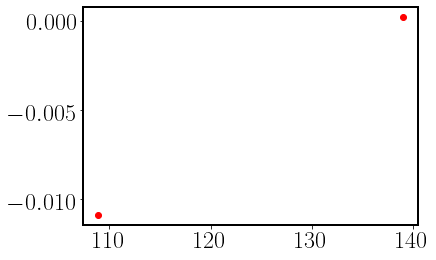

Wavelength_min = 0.0 nm, Wavelength_max = 108.90445222611307 nm


0.7579653181328908

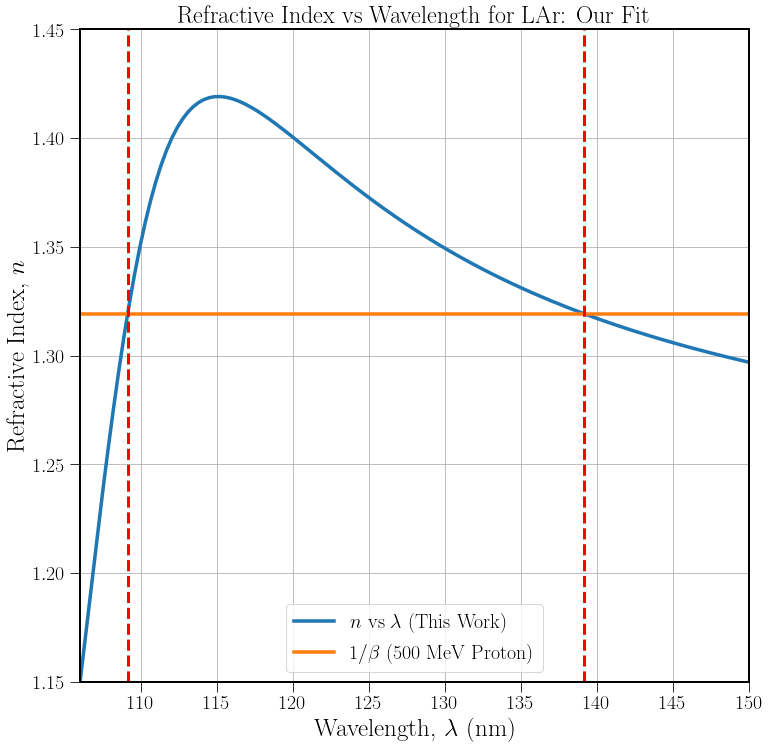

In [6]:
t = 500 #K.E of Proton  in MeV
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 


# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))
lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))

print("Algebraic Method (on Paper): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

lammin = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 + np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
lammax = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 - np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
print("Algebraic Method (Mathematica): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lammin, lammax))


#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

func = n_pvs - y

idx = np.argwhere(np.diff(np.sign(func))).flatten()
print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

plt.plot(lamd[idx], func[idx], 'ro')
plt.show()
print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title("Refractive Index vs Wavelength for LAr: Our Fit", fontsize=24)
ax.plot(lamd, n_pvs, linewidth = 3.5, label="$n$ vs $\lambda$ (This Work)")
ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$ (500 MeV Proton)")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax.set_ylabel('Refractive Index, $n$',fontsize=25)
ax.grid()
ax.legend(fontsize=20)

# lamdmin = 106.6 #UV-Resonant wavelength in nm 
# lamdmax = np.sqrt((a_0 - beta**(-2))/((a_0 - beta**(-2) + a_uv))) * lamd_uv
plt.axvline(lamdmax, ls='--',c='r',lw=3) #lamdmax
plt.axvline(lamdmin, ls='--',c='r',lw=3) #lamdmin


# print("K.E(T) = {} MeV, beta = {:.2f}, wavelength_min = {} nm,  wavelength_max = {:.1f} nm, n = {:.2f}".format(t,beta,lamdmin,lamdmax,n_pvs[index]))
# print("wavelength = {:.1f} nm, n^2 = {}".format(wavelength,n2_babics[index]))

plt.ylim([1.15, 1.45])
plt.xlim([106,150])
# plt.savefig("n_vs_lambda_near_resonance_ourfit_P500MeVzoom.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

beta

Algebraic Method (on Paper): Wavelength_min = 112.21537399475207 nm, Wavelength_max = 119.67611908457438 nm
Algebraic Method (Mathematica): Wavelength_min = 112.21537399475197 nm, Wavelength_max = 119.6761190845744 nm


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in reciprocal
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


0.7131157214873879

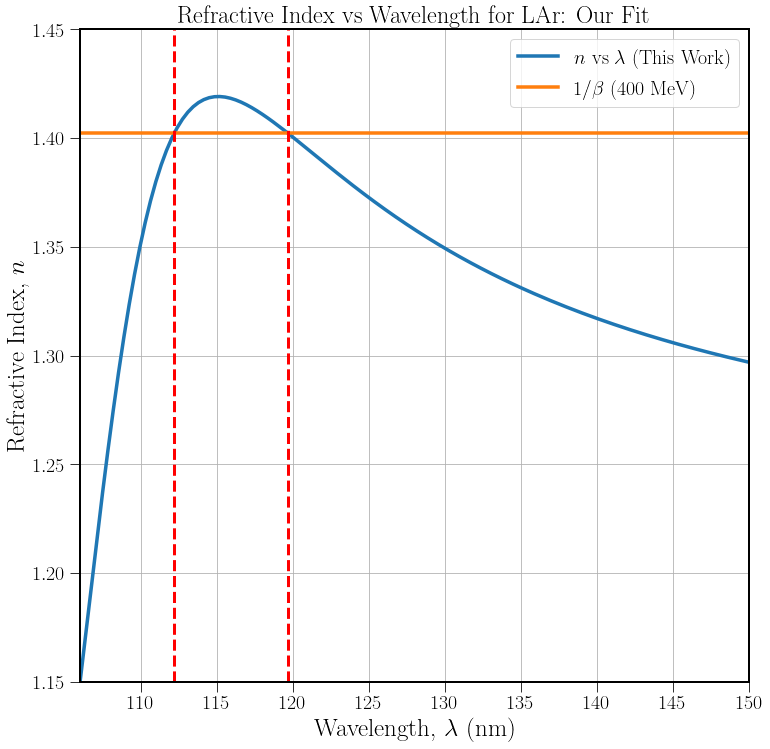

In [7]:
t = 400 #K.E of Proton  in MeV
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 


# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))
lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))

print("Algebraic Method (on Paper): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

lammin = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 + np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
lammax = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 - np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
print("Algebraic Method (Mathematica): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lammin, lammax))


#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

func = n_pvs - y

# idx = np.argwhere(np.diff(np.sign(func))).flatten()
# print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

# plt.plot(lamd[idx], func[idx], 'ro')
# plt.show()
# print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title("Refractive Index vs Wavelength for LAr: Our Fit", fontsize=24)
ax.plot(lamd, n_pvs, linewidth = 3.5, label="$n$ vs $\lambda$ (This Work)")
ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta $ (400 MeV)")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax.set_ylabel('Refractive Index, $n$',fontsize=25)
ax.grid()
ax.legend(fontsize=20)

# lamdmin = 106.6 #UV-Resonant wavelength in nm 
# lamdmax = np.sqrt((a_0 - beta**(-2))/((a_0 - beta**(-2) + a_uv))) * lamd_uv
plt.axvline(lamdmax, ls='--',c='r',lw=3) #lamdmax
plt.axvline(lamdmin, ls='--',c='r',lw=3) #lamdmin


# print("K.E(T) = {} MeV, beta = {:.2f}, wavelength_min = {} nm,  wavelength_max = {:.1f} nm, n = {:.2f}".format(t,beta,lamdmin,lamdmax,n_pvs[index]))
# print("wavelength = {:.1f} nm, n^2 = {}".format(wavelength,n2_babics[index]))

plt.ylim([1.15, 1.45])
plt.xlim([106,150])

# plt.savefig("n_vs_lambda_near_resonance_ourfit_P400MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

beta

Algebraic Method (on Paper): Wavelength_min = 114.25870587211331 nm, Wavelength_max = 116.0676642813296 nm
Algebraic Method (Mathematica): Wavelength_min = 114.25870587211364 nm, Wavelength_max = 116.06766428132937 nm


0.7052137992251059

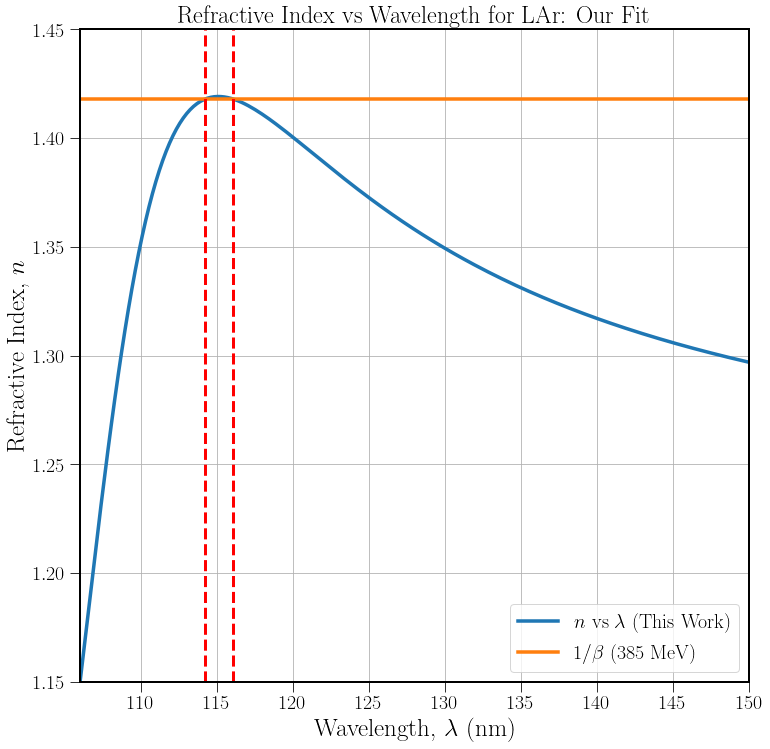

In [14]:
t = 385 #K.E of Proton  in MeV
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 


# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))
lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))

print("Algebraic Method (on Paper): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

lammin = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 + np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
lammax = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 - np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
print("Algebraic Method (Mathematica): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lammin, lammax))


#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

func = n_pvs - y

# idx = np.argwhere(np.diff(np.sign(func))).flatten()
# print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

# plt.plot(lamd[idx], func[idx], 'ro')
# plt.show()
# print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title("Refractive Index vs Wavelength for LAr: Our Fit", fontsize=24)
ax.plot(lamd, n_pvs, linewidth = 3.5, label="$n$ vs $\lambda$ (This Work)")
ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta $ (385 MeV)")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax.set_ylabel('Refractive Index, $n$',fontsize=25)
ax.grid()
ax.legend(fontsize=20)

# lamdmin = 106.6 #UV-Resonant wavelength in nm 
# lamdmax = np.sqrt((a_0 - beta**(-2))/((a_0 - beta**(-2) + a_uv))) * lamd_uv
plt.axvline(lamdmax, ls='--',c='r',lw=3) #lamdmax
plt.axvline(lamdmin, ls='--',c='r',lw=3) #lamdmin


# print("K.E(T) = {} MeV, beta = {:.2f}, wavelength_min = {} nm,  wavelength_max = {:.1f} nm, n = {:.2f}".format(t,beta,lamdmin,lamdmax,n_pvs[index]))
# print("wavelength = {:.1f} nm, n^2 = {}".format(wavelength,n2_babics[index]))

plt.ylim([1.15, 1.45])
plt.xlim([106,150])

plt.savefig("n_vs_lambda_near_resonance_ourfit_P385MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

beta

Algebraic Method (on Paper): Wavelength_min = 115.09324515844652 nm, Wavelength_max = 115.13028306390594 nm
Algebraic Method (Mathematica): Wavelength_min = 115.0932451584367 nm, Wavelength_max = 115.13028306391573 nm


0.7046536721764777

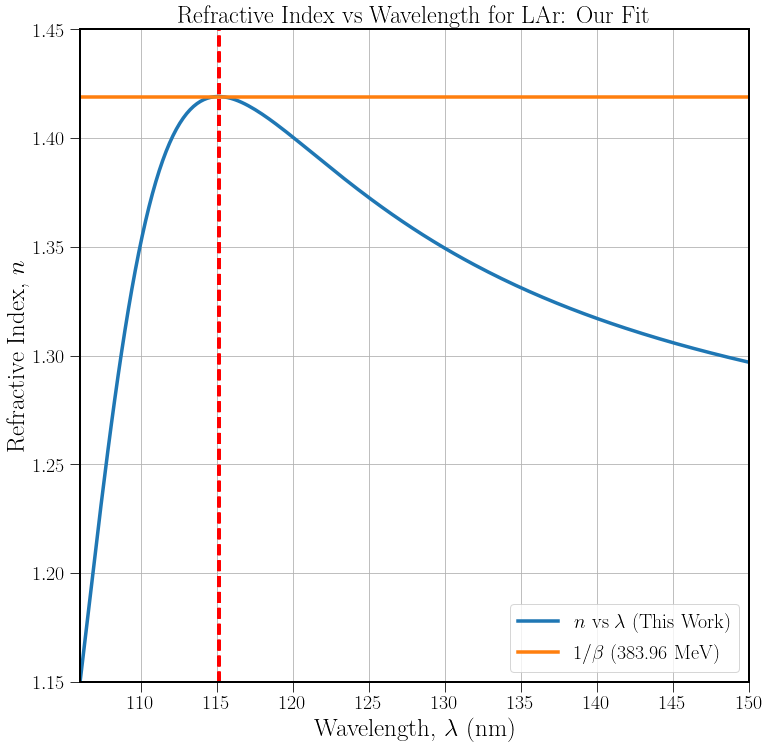

In [15]:
t = 383.962 #K.E of Proton  in MeV
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 


# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))
lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))

print("Algebraic Method (on Paper): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

lammin = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 + np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
lammax = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 - np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
print("Algebraic Method (Mathematica): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lammin, lammax))


#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

func = n_pvs - y

# idx = np.argwhere(np.diff(np.sign(func))).flatten()
# print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

# plt.plot(lamd[idx], func[idx], 'ro')
# plt.show()
# print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title("Refractive Index vs Wavelength for LAr: Our Fit", fontsize=24)
ax.plot(lamd, n_pvs, linewidth = 3.5, label="$n$ vs $\lambda$ (This Work)")
ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta $ (383.96 MeV)")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax.set_ylabel('Refractive Index, $n$',fontsize=25)
ax.grid()
ax.legend(fontsize=20)

# lamdmin = 106.6 #UV-Resonant wavelength in nm 
# lamdmax = np.sqrt((a_0 - beta**(-2))/((a_0 - beta**(-2) + a_uv))) * lamd_uv
plt.axvline(lamdmax, ls='--',c='r',lw=3) #lamdmax
plt.axvline(lamdmin, ls='--',c='r',lw=3) #lamdmin


# print("K.E(T) = {} MeV, beta = {:.2f}, wavelength_min = {} nm,  wavelength_max = {:.1f} nm, n = {:.2f}".format(t,beta,lamdmin,lamdmax,n_pvs[index]))
# print("wavelength = {:.1f} nm, n^2 = {}".format(wavelength,n2_babics[index]))

plt.ylim([1.15, 1.45])
plt.xlim([106,150])

plt.savefig("n_vs_lambda_near_resonance_ourfit_P384MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

beta

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt


Algebraic Method (on Paper): Wavelength_min = nan nm, Wavelength_max = nan nm
Algebraic Method (Mathematica): Wavelength_min = nan nm, Wavelength_max = nan nm


0.6997431492867493

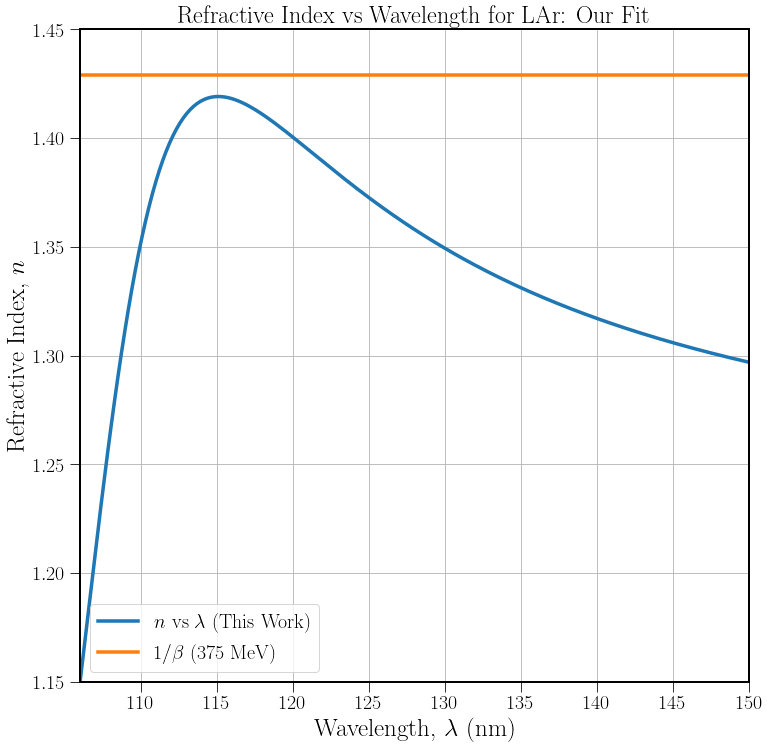

In [17]:
t = 375 #K.E of Proton  in MeV
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 


# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))
lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))

print("Algebraic Method (on Paper): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

lammin = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 + np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
lammax = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 - np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
print("Algebraic Method (Mathematica): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lammin, lammax))


#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

func = n_pvs - y

# idx = np.argwhere(np.diff(np.sign(func))).flatten()
# print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

# plt.plot(lamd[idx], func[idx], 'ro')
# plt.show()
# print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title("Refractive Index vs Wavelength for LAr: Our Fit", fontsize=24)
ax.plot(lamd, n_pvs, linewidth = 3.5, label="$n$ vs $\lambda$ (This Work)")
ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta $ (375 MeV)")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax.set_ylabel('Refractive Index, $n$',fontsize=25)
ax.grid()
ax.legend(fontsize=20)

# lamdmin = 106.6 #UV-Resonant wavelength in nm 
# lamdmax = np.sqrt((a_0 - beta**(-2))/((a_0 - beta**(-2) + a_uv))) * lamd_uv
plt.axvline(lamdmax, ls='--',c='r',lw=3) #lamdmax
plt.axvline(lamdmin, ls='--',c='r',lw=3) #lamdmin


# print("K.E(T) = {} MeV, beta = {:.2f}, wavelength_min = {} nm,  wavelength_max = {:.1f} nm, n = {:.2f}".format(t,beta,lamdmin,lamdmax,n_pvs[index]))
# print("wavelength = {:.1f} nm, n^2 = {}".format(wavelength,n2_babics[index]))

plt.ylim([1.15, 1.45])
plt.xlim([106,150])

plt.savefig("n_vs_lambda_near_resonance_ourfit_P375MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

beta

Wavelength corrsponding to the max refractive index value = 99.15457728864432 nm
0.00029570660364797163 1.4191220261503081


(2.0654145060916562e-06, 1.41913733657246, 0.7046534357380998)

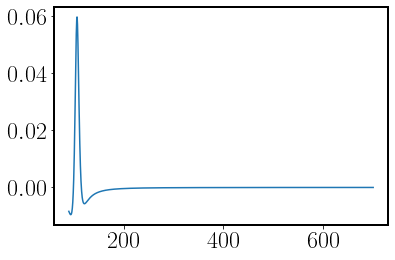

In [37]:
from sympy import exp, Symbol, nsolve

#Finding the lowest K.E of Proton that emits Cerenkov radiation from the asymtotic behaviour of the refractive index 
#(finding the peak of n by setting it's first derivative to zero)

# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamd = np.linspace(90,700,2000)   #wavelength of light 

#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

#Symmetric derivative formula
def fun(lamd):
    return a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

def d_fun(lamd):
    h = 1e-5
    return (fun(lamd+h)-fun(lamd-h))/(2*h)

plt.plot(lamd,d_fun(lamd))

idx = np.argwhere(np.diff(np.sign(d_fun(lamd)))).flatten()
print("Wavelength corrsponding to the max refractive index value = {} nm".format(lamd[idx[0]]))
print(d_fun(115.00750375187594), fun(115.00750375187594))

# sp.solve(d_fun(lamd), lamd)
# fsolve(d_fun,lamd)
# sp.solve(d_fun,lamd)

# d_fun(lamd) == 0
# sp.solve(d_fun,lamd)
# y = nsolve(d_fun)

d_fun(115.111), fun(115.111), 1/fun(115.111)

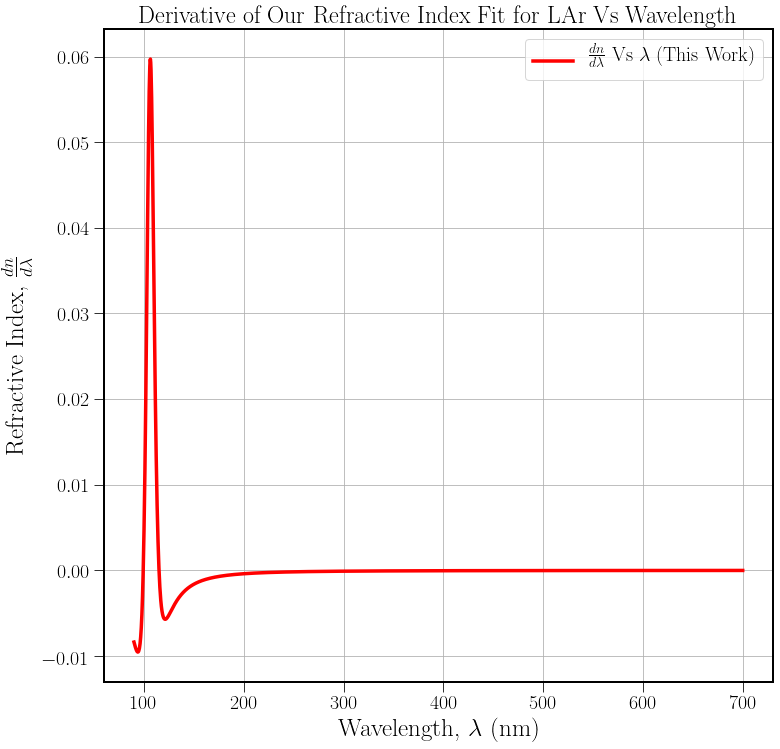

In [38]:
# plt.plot(lamd,d_fun(lamd))


t = 383.962 #K.E of Proton  in MeV
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 


# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

# lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))
# lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))

# print("Algebraic Method (on Paper): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

# lammin = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 + np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
# lammax = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 - np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
# print("Algebraic Method (Mathematica): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lammin, lammax))


# #Formula: 
# n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

# func = n_pvs - y

# idx = np.argwhere(np.diff(np.sign(func))).flatten()
# print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

# plt.plot(lamd[idx], func[idx], 'ro')
# plt.show()
# print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title("Derivative of Our Refractive Index Fit  for LAr Vs Wavelength", fontsize=24)
ax.plot(lamd, d_fun(lamd), linewidth = 3.5, c = 'r', label="$\\frac{dn}{d\\lambda}$ Vs $\\lambda$ (This Work)")
# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta $ (383.96 MeV)")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax.set_ylabel('Refractive Index, $\\frac{dn}{d\\lambda}$',fontsize=25)
ax.grid()
ax.legend(fontsize=20)

# lamdmin = 106.6 #UV-Resonant wavelength in nm 
# lamdmax = np.sqrt((a_0 - beta**(-2))/((a_0 - beta**(-2) + a_uv))) * lamd_uv
# plt.axvline(lamdmax, ls='--',c='r',lw=3) #lamdmax
# plt.axvline(lamdmin, ls='--',c='r',lw=3) #lamdmin


# print("K.E(T) = {} MeV, beta = {:.2f}, wavelength_min = {} nm,  wavelength_max = {:.1f} nm, n = {:.2f}".format(t,beta,lamdmin,lamdmax,n_pvs[index]))
# print("wavelength = {:.1f} nm, n^2 = {}".format(wavelength,n2_babics[index]))

# plt.ylim([1.15, 1.75])
# plt.xlim([106,150])

plt.savefig("derivative_n_vs_lambda.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

# beta

In [39]:
#Trial 

def find_first_zero(d_fun, min, max, tol=1e-3):
    min, max = float(min), float(max)
    assert (max + tol) > max
    while (max - min) > tol:
        mid = (min + max) / 2
        if func(mid) == 0:
            max = mid
        else:
            min = mid
    return max
print(find_first_zero)

<function find_first_zero at 0x000002B1959CAF28>


<font size = 5>

The average energy loss per unit length for proton travelling in LAr can be found from the Bethe-Bloch equation, 
$$
-\frac{dE}{dx} = K\frac{\rho Z}{A} \frac{z^2}{\beta^2} [ln \space (\frac{2m_{e}c^2\gamma^2\beta^2}{I}) - \beta^2] = \frac{k_{1}}{\beta^2} ln(k_{2} \frac{\beta^2}{1-\beta^2}) - k_{1}
$$

Here, 
      $$ k_{1} =  K\frac{\rho Z}{A} z^2 $$  and  $$ k_{2} = \frac{2m_{e}c^2}{I} $$

where, z is the charge of the travelling proton; $\rho$ is the density of LAr, Z is its atomic number and A atomic mass. 

Mean excitation potential, $$ I = (10 \space eV) . Z  \space (Bloch's Approximation) \space   (for Z > 20) $$ 



For LAr, I = 23.6 eV 

The constant K is given by, 

$$ K = \frac{4\pi a^2 (\hbar c)^2 N_{A} (10^3 kg)}{m_{e} c^2} = 30.7 \space keVm^2/kg = 0.0307 \space MeVm^2/kg = 0.307 \space MeVcm^2/g $$ 
    
Non-relativistic approx: 
    
The kinetic energy of the proton is approximated with the classical formula, 
    
$$ 
T = \frac{1}{2} mv^2 = \frac{1}{2} mc^2 \beta^2 
$$

Therefore, $$\beta = \sqrt{\frac{2T}{mc^2}}$$
    
Relativistic approach:
    
We take the full relativistic formula for the kinetic energy (T) thus $\beta$,  

$$ T = \gamma mc^2 - mc^2 = (\gamma - 1) mc^2 $$
$$ \gamma = 1 + \frac{T}{mc^2} = \frac{1}{\sqrt{(1- \beta^2)}} $$

$$
\beta = \sqrt{1 - \frac{1}{(1 + \frac{T}{mc^2})^2}} 
$$

1.)  Relativistic vs nonrelativistic Bethe-Bloch
2.)  NIST vs Bethe-Bloch (stopping power curves)
***  Decision:  Which curve is best to use for the Cerenkov emission? Ans: Relativistic

    


In [8]:
#Betalist

rho = 1.38 #density of LAr in kg/m^3 at 89K temperature  
me = 9.11e-31 #Electron's mass in Kg.
io = 23.6e-6  #Average Ionization Potential of LAr in MeV
k =  0.307  #Constant in MeV.cm^2/g 
zb = 18  #Atomic No of Ar (absorber)
a = 39.948  #Mass no of Ar (absorber)
zs = 1 #charge of the particle 
c = 3e8
e = me*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)
mp = 938 #Proton's mass in MeV/c^2 
k1 = k*rho*zb*zs**2/a
k2 = 2*e/io 

# lamd = np.linspace(100,200,925)   #wavelength of light 

#Defining a function to calculate the betalist for some given initial K.E of Proton in LAr

def make_betalist(t):
    ''' t = t_list input from data'''
    
    
    xlist = []
    tlist = [] 
    tslope = []
    betalist = []

    
    x = 0 #in cm 
    dx = 0.1 #in cm 
    
    
    while t>0: 
        
        beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
        t_slope = (((k1*np.log(k2*(beta**2/(1-beta**2))))/beta**2) - k1)
        t = t - (t_slope * dx)
        tslope.append(t_slope)
        tlist.append(t)
        betalist.append(beta)

        x=x+dx    
        xlist.append(x)
    
         
    #Linear Interpolation: 

    if (len(tlist)>1)  and (len(xlist)>1):
    
        tnp1 = tlist[-1]
        tnp2 = tlist[-2]
        xnp1 = xlist[-1]
        xnp2 = xlist[-2]
        
        range = xnp2 - (tnp2 * ((xnp1-xnp2)/(tnp1 - tnp2))) #Relativistic approach 

#         print("K.E: {} MeV, Range (Rel approach): {:.3f} cm, betalist: {}".format(tlist,range,betalist, sep='\n')
#         print((tlist1,tslope1) , (tlist2, tslope2))
               
        return betalist  #range
#         return betalist

# t = np.array([1,10,20,50,100,200,250,300,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV
# print(t, range, betalist, sep='\n')
beta_500 = make_betalist(500)
np.shape(beta_500), np.shape(n_pvs)
# beta_500
# beta_20 = make_betalist(20)

((925,), (2000,))

<font size=4>

## Linear Interpolation: 

This method was used to determine the total distance travelled (i.e range) by Proton in LAr before its K.E becomes zero. As in the CSDA, K.E falls off sharply to zero so we applied the simplest interpolation formula to effectively determine the x-value for which the K.E is zero. In this method, the last two data points have been used for x and T (one posive and one negative value) to find the x for which T = 0. 

Let's suppose these two datapoints (the two green points on the lower right: one above and one below the T = 0 axis) are labelled as $(x_{n-1}, T_{n-1})$ and $(x_{n}, T_{n})$. Then. the straightline joining these two points are given by, 

$$
T - T_{n-1} = (\frac {T_{n} - T_{n-1}}{x_{n} - x_{n-1}}) . (x - x_{n-1}) 
$$ 

Now setting T = 0 in the above equation will give us the range of the Proton i.e x = R (range), 

$$
R = x_{n-1} - T_{n-1} . (\frac {x_{n} - x_{n-1}} {T_{n} - T_{n-1}}) 
$$ 

I have used this linear interpolation method to determine the range of Proton in LAr using various methods.

<font size = 5>
    
Frank-Tamm formula for calculating number of Cerenkov lights emitted is given by,
    
$$\frac{d^2N}{dE dx} = (\frac{\alpha z^2}{\hbar c}) sin^2\theta_{c}  \approx 370. sin^2\theta_{c} ev^{-1} cm^{-1} $$
    
where, $ z = 1 $ for Proton and $\alpha$ is the fine structure constant 
    
Equivalently, 
    
    
$$ \frac{d^2N}{dx d\lambda} = \frac{2 \pi \alpha z^2}{\lambda^2} (1 - \frac{1}{\beta^2 n^2(\lambda)})  \approx 370. sin^2\theta_{c}$$
    
Integrating over $\lambda$ gives, 
    
$$ \frac{dN}{dx} = \int_{\lambda_{min}}^{\lambda_{max}} \frac{2 \pi \alpha z^2}{\lambda^2} (1 - \frac{1}{\beta^2 n^2(\lambda)}) d\lambda  = I(\beta, x) $$
    
and finally, number of Cerenkov photons can be determined by integrating once again over x,
        
$$ N = \int dN = \int_{0}^{Range} I(\beta, x) dx $$
    
Gaussian quadrature method has been used for integration
   

In [22]:
#Calculating the total Cerenkov light 

t = 500 #K.E of Proton  in MeV
# t = np.array([10,20,50,100,200,250,300,400,500]) #initial  K.E of the proton in MeV 600,700,800,900,1000
z = 1 #Charge of Proton 
alpha = 1/137
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
beta

0.7579653181328908

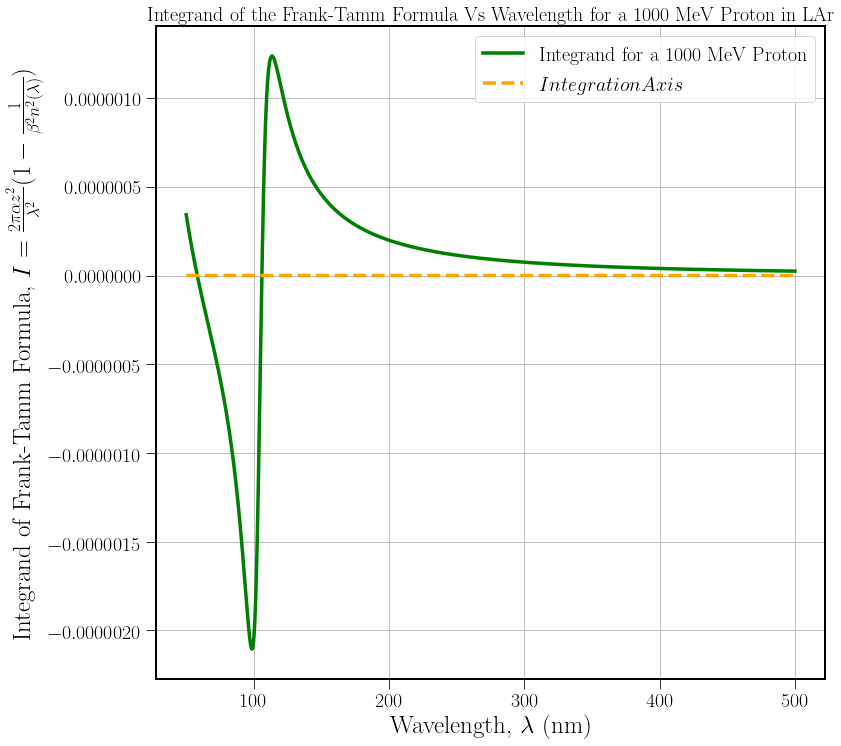

In [23]:
#Calculating the total Cerenkov light 

t = 1000 #K.E of Proton  in MeV
# t = np.array([10,20,50,100,200,250,300,400,500]) #initial  K.E of the proton in MeV 600,700,800,900,1000
z = 1 #Charge of Proton 
alpha = 1/137
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 

lamd = np.linspace(50,500,2000)   #wavelength of light 
y= np.linspace(0,0,2000)

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Formula: 
# n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

#Symmetric derivative formula
def n_pvs(lamd):
    return a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

#Symmetric integrand formula
def integrand(lamd):
    return (2*np.pi*alpha*z**2/lamd**2) * (1 - (1/(beta**2*n_pvs(lamd)**2)))

# integrand= (2*np.pi*alpha*z**2/lamd**2) * (1 - (1/(beta**2*n_pvs**2))) 

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title("Integrand of the Frank-Tamm Formula Vs Wavelength for a 1000 MeV Proton in LAr", fontsize=20)
ax.plot(lamd, integrand(lamd), linewidth = 3.5, c = 'g', label= "Integrand for a 1000 MeV Proton") #,label="$ I = \\frac{2 \\pi \\alpha z^2}{\\lambda^2} (1 - \\frac{1}{\\beta^2 n^2 (\\lambda)}) $ Vs $\\lambda$")
# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta $ (383.96 MeV)")

ax.plot(lamd, y, linewidth = 3.5, c= 'orange', ls= 'dashed', label="$Integration Axis$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax.set_ylabel('Integrand of Frank-Tamm Formula, $ I = \\frac{2 \\pi \\alpha z^2}{\\lambda^2} (1 - \\frac{1}{\\beta^2 n^2 (\\lambda)}) $',fontsize=25)
ax.grid()
ax.legend(fontsize=20)

# plt.ylim([1.15, 1.75])
# plt.xlim([106,150])

# plt.savefig("I_vs_lambda_P1000MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

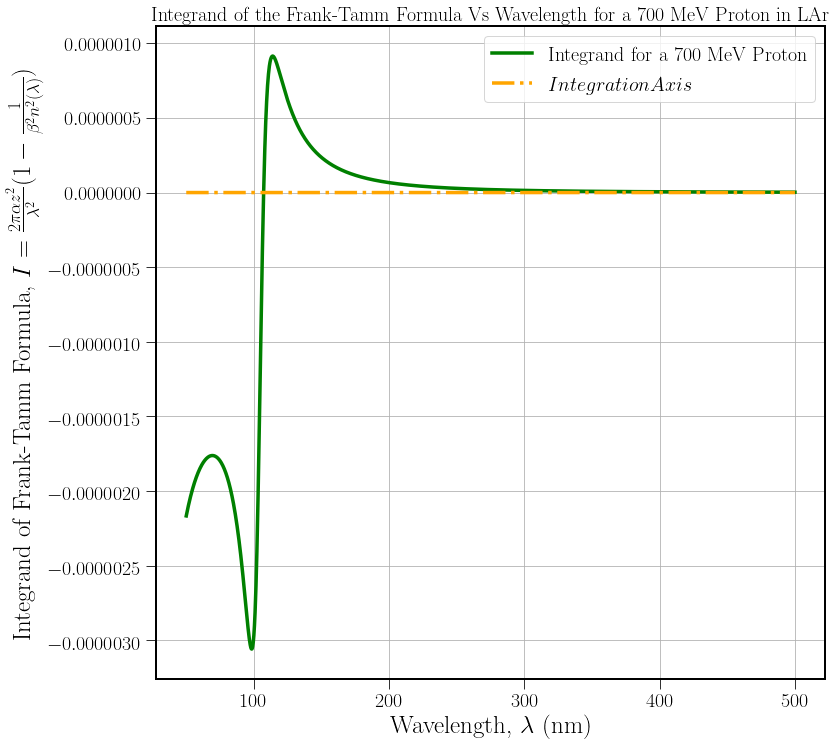

In [67]:
#Calculating the total Cerenkov light 

t = 700 #K.E of Proton  in MeV
# t = np.array([10,20,50,100,200,250,300,400,500]) #initial  K.E of the proton in MeV 600,700,800,900,1000
z = 1 #Charge of Proton 
alpha = 1/137
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 

lamd = np.linspace(50,500,2000)   #wavelength of light 
y= np.linspace(0,0,2000)

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Formula: 
# n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

#Symmetric derivative formula
def n_pvs(lamd):
    return a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

#Symmetric integrand formula
def integrand(lamd):
    return (2*np.pi*alpha*z**2/lamd**2) * (1 - (1/(beta**2*n_pvs(lamd)**2)))

# integrand= (2*np.pi*alpha*z**2/lamd**2) * (1 - (1/(beta**2*n_pvs**2))) 

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title("Integrand of the Frank-Tamm Formula Vs Wavelength for a 700 MeV Proton in LAr", fontsize=20)
ax.plot(lamd, integrand(lamd), linewidth = 3.5, c = 'g', label= "Integrand for a 700 MeV Proton") #,label="$ I = \\frac{2 \\pi \\alpha z^2}{\\lambda^2} (1 - \\frac{1}{\\beta^2 n^2 (\\lambda)}) $ Vs $\\lambda$")
# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta $ (383.96 MeV)")

ax.plot(lamd, y, linewidth = 3.5, c= 'orange', ls= 'dashdot', label="$Integration Axis$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax.set_ylabel('Integrand of Frank-Tamm Formula, $ I = \\frac{2 \\pi \\alpha z^2}{\\lambda^2} (1 - \\frac{1}{\\beta^2 n^2 (\\lambda)}) $',fontsize=25)
ax.grid()
ax.legend(fontsize=20)

# plt.ylim([1.15, 1.75])
# plt.xlim([106,150])

# plt.savefig("I_vs_lambda_P700MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

Algebraic Method (on Paper): Wavelength_min = 109.15369782633309 nm, Wavelength_max = 139.11078368042578 nm


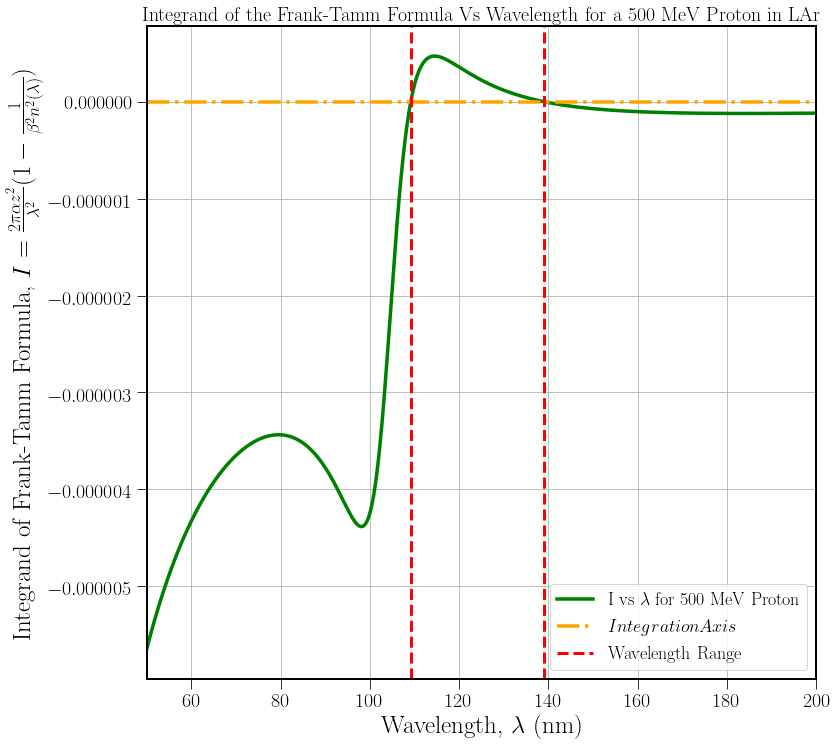

In [76]:
#Calculating the total Cerenkov light 

t = 500 #K.E of Proton  in MeV
# t = np.array([10,20,50,100,200,250,300,400,500]) #initial  K.E of the proton in MeV 600,700,800,900,1000
z = 1 #Charge of Proton 
alpha = 1/137
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 

lamd = np.linspace(50,500,2000)   #wavelength of light 
y= np.linspace(0,0,2000)

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))
lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))

print("Algebraic Method (on Paper): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

func = n_pvs - y

#Formula: 
# n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

#Symmetric derivative formula
def n_pvs(lamd):
    return a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

#Symmetric integrand formula
def integrand(lamd):
    return (2*np.pi*alpha*z**2/lamd**2) * (1 - (1/(beta**2*n_pvs(lamd)**2)))

# integrand= (2*np.pi*alpha*z**2/lamd**2) * (1 - (1/(beta**2*n_pvs**2))) 

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title("Integrand of the Frank-Tamm Formula Vs Wavelength for a 500 MeV Proton in LAr", fontsize=20)
ax.plot(lamd, integrand(lamd), linewidth = 3.5, c = 'g', label= "I vs $\\lambda$ for 500 MeV Proton") #,label="$ I = \\frac{2 \\pi \\alpha z^2}{\\lambda^2} (1 - \\frac{1}{\\beta^2 n^2 (\\lambda)}) $ Vs $\\lambda$")
# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta $ (383.96 MeV)")

ax.plot(lamd, y, linewidth = 3.5, c= 'orange', ls= 'dashdot', label="$Integration Axis$")  #, ls= 'dotted'

plt.axvline(lamdmax, ls='--',c='r',lw=3, label= 'Wavelength Range') #lamdmax # for Integration
plt.axvline(lamdmin, ls='--',c='r',lw=3) #lamdmin

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax.set_ylabel('Integrand of Frank-Tamm Formula, $ I = \\frac{2 \\pi \\alpha z^2}{\\lambda^2} (1 - \\frac{1}{\\beta^2 n^2 (\\lambda)}) $',fontsize=25)

ax.grid()
ax.legend(fontsize=18)

# plt.ylim([1.15, 1.75])
plt.xlim([50,200])

# plt.savefig("I_vs_lambda_P500MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

# plt.savefig("I_vs_lambda_P500MeVzoom.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

Algebraic Method (on Paper): Wavelength_min = 109.15369782633309 nm, Wavelength_max = 139.11078368042578 nm


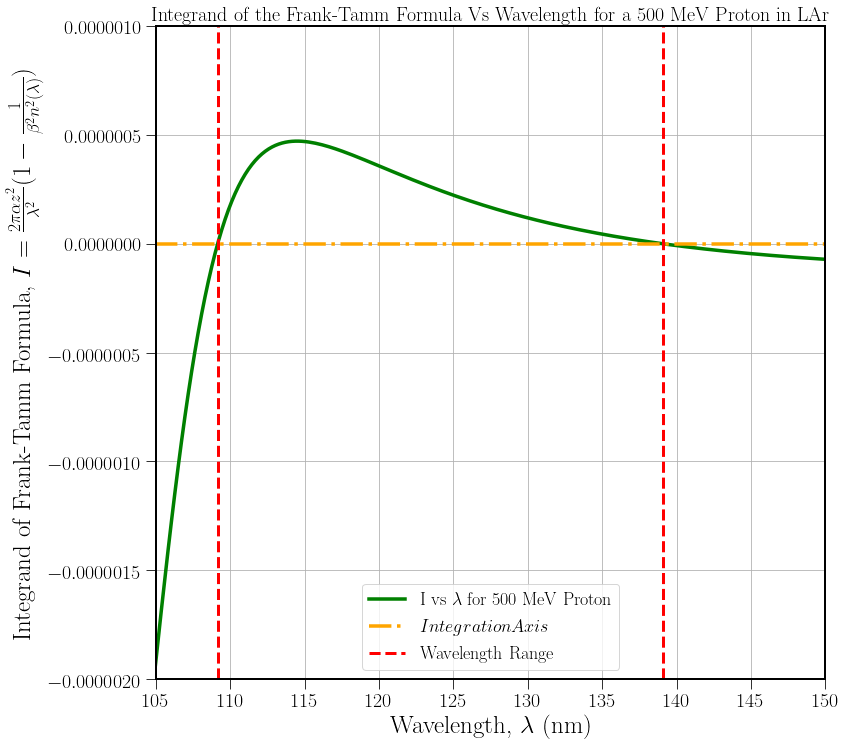

In [7]:
#Calculating the total Cerenkov light 

t = 500 #K.E of Proton  in MeV
# t = np.array([10,20,50,100,200,250,300,400,500]) #initial  K.E of the proton in MeV 600,700,800,900,1000
z = 1 #Charge of Proton 
alpha = 1/137
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 

lamd = np.linspace(50,500,2000)   #wavelength of light 
y= np.linspace(0,0,2000)

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))
lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))

print("Algebraic Method (on Paper): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

func = n_pvs - y

#Formula: 
# n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

#Symmetric derivative formula
def n_pvs(lamd):
    return a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

#Symmetric integrand formula
def integrand(lamd):
    return (2*np.pi*alpha*z**2/lamd**2) * (1 - (1/(beta**2*n_pvs(lamd)**2)))

# integrand= (2*np.pi*alpha*z**2/lamd**2) * (1 - (1/(beta**2*n_pvs**2))) 


#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title("Integrand of the Frank-Tamm Formula Vs Wavelength for a 500 MeV Proton in LAr", fontsize=20)
ax.plot(lamd, integrand(lamd), linewidth = 3.5, c = 'g', label= "I vs $\\lambda$ for 500 MeV Proton") #,label="$ I = \\frac{2 \\pi \\alpha z^2}{\\lambda^2} (1 - \\frac{1}{\\beta^2 n^2 (\\lambda)}) $ Vs $\\lambda$")
# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta $ (383.96 MeV)")

ax.plot(lamd, y, linewidth = 3.5, c= 'orange', ls= 'dashdot', label="$Integration Axis$")  #, ls= 'dotted'

plt.axvline(lamdmax, ls='--',c='r',lw=3, label= 'Wavelength Range') #lamdmax # for Integration
plt.axvline(lamdmin, ls='--',c='r',lw=3) #lamdmin

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax.set_ylabel('Integrand of Frank-Tamm Formula, $ I = \\frac{2 \\pi \\alpha z^2}{\\lambda^2} (1 - \\frac{1}{\\beta^2 n^2 (\\lambda)}) $',fontsize=25)

ax.grid()
ax.legend(fontsize=18)

plt.ylim([-0.000002, 0.000001])
plt.xlim([105,150])

# plt.savefig("I_vs_lambda_P500MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

plt.savefig("I_vs_lambda_P500MeVzooms.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

(array([ 383.96156,  385.     ,  400.     ,  450.     ,  500.     ,
         550.     ,  600.     ,  650.     ,  700.     ,  750.     ,
         800.     ,  850.     ,  900.     , 1000.     ]),
 [0.0,
  0.010699949173122017,
  6.789321534722043,
  227.76644918880726,
  932.306317713878,
  2302.814102679058,
  4522.40557836276,
  7819.086282652897,
  12534.30341429221,
  19120.02690400369,
  27564.389488452165,
  37692.94422399464,
  49351.33892729327,
  76724.8143235782])

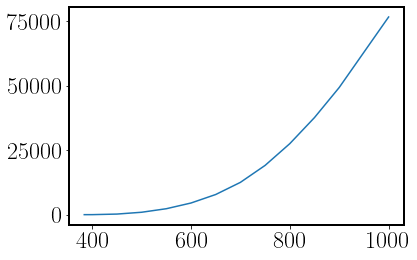

In [64]:
#Calculating the total Cerenkov light 

# t = 500 #K.E of Proton  in MeV
# t = np.array([10,20,50,100,200,250,300,400,500]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 

mp = 938  #Proton's mass in MeV
#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))
lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

func = lambda wl,b: ((2 * np.pi * alpha) / (wl**2 )) * (1- (1/(b**2 * n_pvs(wl)*n_pvs(wl))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# t = np.array([10,20,50,100,200,250,300,400,500]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t = np.array([383.96156,385,400,450,500,550,600,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

cerenkovfinallist = []
cerenkovtsum = []
for j in t: 
    cerenkovtlist = []
    cerenkovsum = 0
#     print(j)
#     print(make_betalist(j))
    mybetalist = make_betalist(j)
    filtered_lst = [x for x in mybetalist if x > 0.7046534357]
#     print(filtered_lst)
    for i in filtered_lst:  #[0:20]
#         lmin = ((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2))))
#         lmax = ((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2))))
#         print(lmin, lmax)
        if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) < 1:
            lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
            lmax = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
#             print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2))))
        if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) >= 1:
            lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
            lmax = np.inf
#             print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2))))
        no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(no_cerenkov_x[0])
        cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
        cerenkovsum += no_cerenkov_x[0]
        
    cerenkovfinallist.append(cerenkovtlist)
    cerenkovtsum.append(cerenkovsum * 1e6) #conversion factor to standard units
    
    
plt.plot(t, cerenkovtsum)
t, cerenkovtsum
    
# no_cerenkov_x
# n2_grace(100)
# make_betalist(500), 

# plt.plot(cerenkovnolist)
# cerenkovsum * 1e6
# lamdmax

(array([ 383.96156,  385.     ,  400.     ,  450.     ,  500.     ,
         550.     ,  600.     ,  650.     ,  700.     ,  750.     ,
         800.     ,  850.     ,  900.     , 1000.     ]),
 [0.0,
  0.010699949173122017,
  6.789321534722043,
  227.76644918880726,
  932.306317713878,
  2302.814102679058,
  4522.40557836276,
  7819.086282652897,
  12534.30341429221,
  19120.02690400369,
  27564.389488452165,
  37692.94422399464,
  49351.33892729327,
  76724.8143235782])

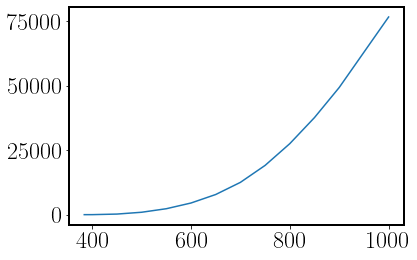

In [11]:
#Calculating the total Cerenkov light 

# t = 500 #K.E of Proton  in MeV
# t = np.array([10,20,50,100,200,250,300,400,500]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 

mp = 938  #Proton's mass in MeV
#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))
lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

func = lambda wl,b: ((2 * np.pi * alpha) / (wl**2 )) * (1- (1/(b**2 * n_pvs(wl)*n_pvs(wl))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# t = np.array([10,20,50,100,200,250,300,400,500]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t = np.array([383.96156,385,400,450,500,550,600,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t= np.array([820])

cerenkovfinallist = []
cerenkovtsum = []
for j in t: 
    cerenkovtlist = []
    cerenkovsum = 0
#     print(j)
#     print(make_betalist(j))
    mybetalist = make_betalist(j)
    filtered_lst = [x for x in mybetalist if x > 0.7046534357]
#     print(filtered_lst)
    for i in filtered_lst:  #[0:20]
#         lmin = ((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2))))
#         lmax = ((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2))))
#         print(lmin, lmax)
        if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) < 1:
            lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
            lmax = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
#             print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2))))
        if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) >= 1:
            lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
            lmax = np.inf
#             print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2))))
        no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(no_cerenkov_x[0])
        cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
        cerenkovsum += no_cerenkov_x[0]
        
    cerenkovfinallist.append(cerenkovtlist)
    cerenkovtsum.append(cerenkovsum * 1e6) #conversion factor to standard units
    
    
plt.plot(t, cerenkovtsum)
t, cerenkovtsum
    
# no_cerenkov_x
# n2_grace(100)
# make_betalist(500), 

# plt.plot(cerenkovnolist)
# cerenkovsum * 1e6
# lamdmax

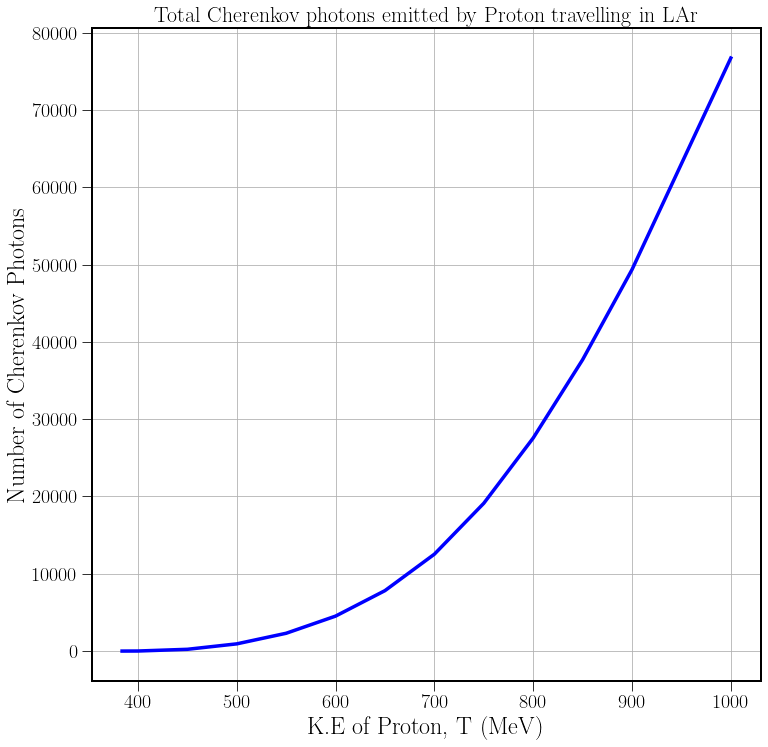

In [65]:
#Plot of Cerenkov photons emitted by Proton in the LAr medium. (no vs T)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Total Cherenkov photons emitted by Proton travelling in LAr", fontsize=22)
ax.plot(t, cerenkovtsum, linewidth = 3.5, color='b')
ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("K.E of Proton, T (MeV)",fontsize=24)
ax.set_ylabel('Number of Cherenkov Photons',fontsize=24)
ax.grid()
# ax.legend(fontsize=18)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
plt.savefig("total_cerenkov_photon_ourfit.jpg")

Refractive index formula for our new fit, 

$$ n_{PVS} (\lambda) = a_{0} + a_{PVS} (\frac{\lambda_{UV}^{-1} - \lambda^{-1}}{(\lambda_{UV}^{-1} - \lambda^{-1})^2 + \Gamma^2}) $$  
    
where, $a_{0} = 1.18416$ , $a_{pvs} = 0.000325985$ and $\Gamma = 0.000693652$ are the best fit parameters.
    
<!-- Now, employing the Cerenkov limit for emission($v > \frac{c}{n}$ i.e $n \geq \frac{1}{\beta}$) requires us to find the solution for $\lambda$ from the inequality relation: 

$$ n_{PVS} (\lambda) = a_{0} + a_{PVS} (\frac{\lambda_{UV}^{-1} - \lambda^{-1}}{(\lambda_{UV}^{-1} - \lambda^{-1})^2 + \Gamma^2}) \geq \frac{1}{\beta} $$  
 -->
Standard form: 

Index(n) in terms of angular frequency, 

\begin{align}
    n(\omega) - 1 = \frac{N e^2 / m}{4 \epsilon_0 \omega_{UV}} \:
    \frac{(\omega_{UV} - \omega)}{(\omega_{UV} - \omega)^2 + \Gamma^2}
\end{align}

Standard form: Absorption

\begin{align}
    \alpha(\omega) &= \frac{N e^2 / m}{2 \epsilon_0 c_0}
    \frac{\omega}{\omega_{UV}}
    \:
    \frac{\Gamma}{(\omega_{UV} - \omega)^2 + \Gamma^2}
    %
    \notag \\ &=
    %
    \left( \frac{N e^2 / m}{4 \epsilon_0 \omega_{UV}}  \right)
    \left( \frac{2 \omega}{c_0}\right)
    \:
    \frac{\Gamma}{(\omega_{UV} - \omega)^2 + \Gamma^2}
\end{align}

Modified form: Index

\begin{align}
    n(\omega) - a_0 &= \frac{a_{PVS}}{2 \pi c_{LAr}} \:
    \frac{(\omega_{UV} - \omega)}{(\omega_{UV} - \omega)^2 + \Gamma^{\prime \: 2}}
    %
    =
    %
    a_{PVS} \:
    \frac{(\lambda_{UV}^{-1} - \lambda^{-1})}{(\lambda_{UV}^{-1} - \lambda^{-1})^2 + \Gamma^2}
\end{align}

Modified form: Absorption

\begin{align}
    \alpha(\omega) &= 
    \left( \frac{a_{PVS}}{2\pi c_{LAr}}  \right)
    \left( \frac{2 \omega}{c_0}\right)
    \:
    \frac{\Gamma^\prime}{(\omega_{UV} - \omega)^2 + \Gamma^{\prime \: 2}}
    %
    \notag \\ \alpha(\lambda) &=
    %
    a_{PVS}
    \left( \frac{2 \omega}{c_0}\right)
    \:
    \frac{\Gamma}{(\lambda^{-1}_{UV} - \lambda^{-1} )^2 + \Gamma^{2}}
    %
    \notag \\ &=
    %
    a_{PVS}
    \left(\frac{4\pi}{\lambda} \frac{c}{c_0}\right)
    \:
    \frac{\Gamma}{(\lambda^{-1}_{UV} - \lambda^{-1} )^2 + \Gamma^{2}}
    %
    \notag \\ &=    \label{e:abs}
    %
    a_{PVS}
    \left(\frac{4\pi}{\lambda} 
    n(\lambda) \right)
    \:
    \frac{\Gamma}{(\lambda^{-1}_{UV} - \lambda^{-1} )^2 + \Gamma^{2}}
\end{align}


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in reciprocal
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in reciprocal
  from ipykernel import kernelapp as app


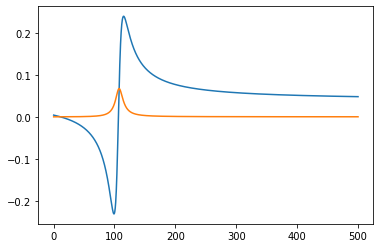

In [3]:
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652


lamd = np.linspace(0,500,2000)   #wavelength of light 
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 
lamd_peak = 115.11 #where n is max 

# lamd = 106.6 #nm
#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

absorption = a_pvs* ((4*np.pi*n_pvs)/lamd) * (gamma/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)) #coefficient alpha 

plt.plot(lamd, (n_pvs-1.18))
plt.plot(lamd, absorption)

# absorption_avg = np.linspace(0.067,0.067,2000)

# print(absorption)
# np.amax(absorption)

absorption_avg = np.linspace(0.0675,0.0675,2000) #n-1.18 = 0.18416 - 0.18 = 0.00416

# np.amax(absorption, axis=None, out=None)

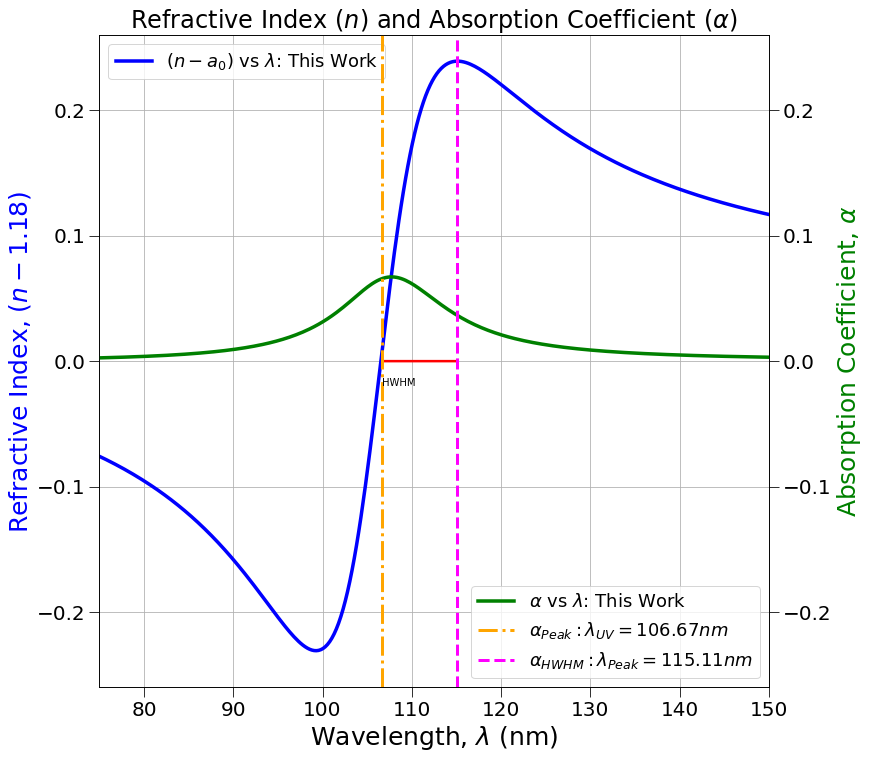

In [6]:
import numpy as np
import matplotlib.pyplot as plt

lamd = np.linspace(0,500,2000)   #wavelength of light 

fig = plt.figure(figsize=(12,12))
# ax1 = plt.subplots(111)
# ax2 = plt.subplots(111)

ax1 = fig.add_subplot(111)
# ax2 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.set_title("Refractive Index ($n$) and Absorption Coefficient ($\\alpha$)", fontsize=24)

ax1.plot(lamd, (n_pvs-1.18), linewidth = 3.5, label="$(n - a_{0})$ vs $\lambda$: This Work", color='b')
ax2.plot(lamd, absorption, linewidth = 3.5, label="$\\alpha$ vs $\lambda$: This Work", color='g')

# lamd_peak = np.linspace(115.11, 115.11,2000)
lamd_peak = 115.11
lamd_uv = 106.67
plt.axvline(lamd_uv,ls='dashdot',c='orange',lw=3, label= "$\\alpha_{Peak}: \\lambda_{UV} = 106.67 nm$") #, label= "$n_{Peak} = \\alpha_{HWHM}$"
plt.axvline(lamd_peak,ls='--',c='magenta',lw=3, label= "$\\alpha_{HWHM}: \\lambda_{Peak} = 115.11 nm$")

ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
ax2.tick_params(axis='both',which='major',labelsize=20,length=10)

ax1.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax1.set_ylabel('Refractive Index, $(n - 1.18)$',fontsize=25, color= 'b')
ax2.set_ylabel('Absorption Coefficient, $\\alpha$',fontsize=25, color='g')

ax1.grid()
ax1.legend(fontsize=18, loc="upper left")
ax2.legend(fontsize=18, loc="lower right")
plt.xlim(75,150)

plt.arrow(x=106.67, y=0, dx=lamd_peak-lamd_uv, dy=0, width=.002, facecolor='red', edgecolor='none') 

#add annotation
plt.annotate('HWHM', xy = (106.67, -0.02))

ax1.set_ylim(-0.26,0.26)
ax2.set_ylim(-0.26,0.26)

# plt.savefig("absorption_coeff_zoom.jpg", bbox_inches='tight')


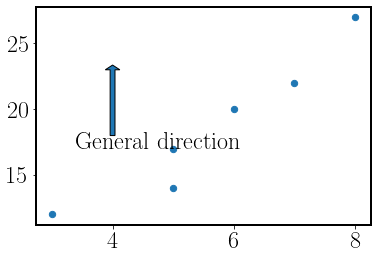

In [88]:
import matplotlib.pyplot as plt

#define two arrays for plotting
A = [3, 5, 5, 6, 7, 8]
B = [12, 14, 17, 20, 22, 27]

#create scatterplot, specifying marker size to be 40
plt.scatter(A, B, s=40)

#add arrow to plot
plt.arrow(x=4, y=18, dx=0, dy=5, width=.08) 

#add annotation
plt.annotate('General direction', xy = (3.4, 17))
  
#display plot 
plt.show()

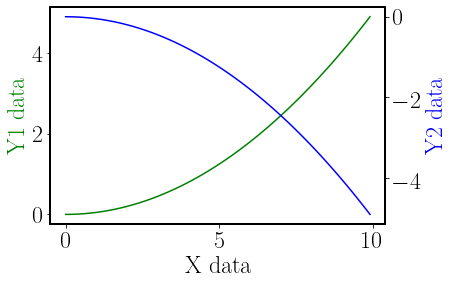

In [34]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()


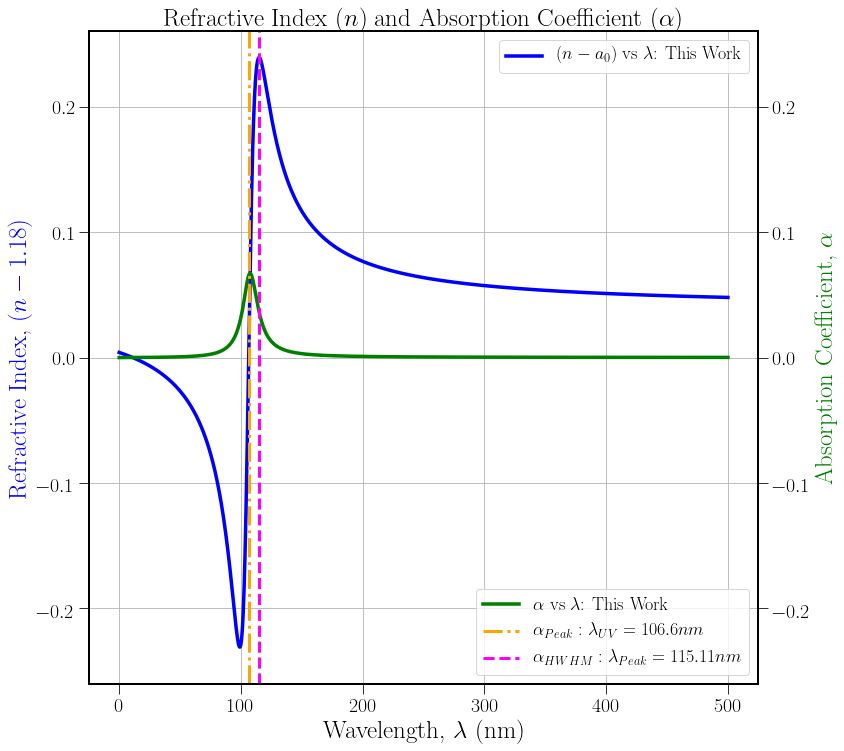

In [119]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
# ax1 = plt.subplots(111)
# ax2 = plt.subplots(111)

ax1 = fig.add_subplot(111)
# fig,ax1 = plt.subplots()
# ax2 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.set_title("Refractive Index ($n$) and Absorption Coefficient ($\\alpha$)", fontsize=25)

ax1.plot(lamd, (n_pvs-1.18), linewidth = 3.5, label="$(n - a_{0})$ vs $\lambda$: This Work", color='b')
ax2.plot(lamd, absorption, linewidth = 3.5, label="$\\alpha$ vs $\lambda$: This Work", color='g')

# lamd_peak = np.linspace(115.11, 115.11,2000)
lamd_peak = 115.11
# plt.axvline(lamd_peak,ls='--',c='red',lw=3)
plt.axvline(lamd_uv,ls='dashdot',c='orange',lw=3, label= "$\\alpha_{Peak}: \\lambda_{UV} = 106.6 nm$") #, label= "$n_{Peak} = \\alpha_{HWHM}$"
plt.axvline(lamd_peak,ls='--',c='magenta',lw=3, label= "$\\alpha_{HWHM}: \\lambda_{Peak} = 115.11 nm$")

ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
ax2.tick_params(axis='both',which='major',labelsize=20,length=10)

ax1.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=25)
ax1.set_ylabel('Refractive Index, $(n - 1.18)$', color='b', fontsize=25)
ax2.set_ylabel('Absorption Coefficient, $\\alpha$', color='g', fontsize=25)

ax1.grid()
# ax2.grid()
ax1.legend(fontsize=18, loc='upper right') #
ax2.legend(fontsize=18, loc='lower right') #

ax1.set_ylim(-0.26,0.26)
ax2.set_ylim(-0.26,0.26)
plt.xlim()

# plt.savefig("absorption_coeff_2yaxes_full.jpg", bbox_inches='tight')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


(array([ 383.96156,  385.     ,  400.     ,  450.     ,  500.     ,
         550.     ,  600.     ,  650.     ,  700.     ,  750.     ,
         800.     ,  850.     ,  900.     , 1000.     ]),
 [0.0,
  0.005544544939817014,
  3.809119865559166,
  141.84512602718712,
  618.0532960924485,
  1601.8819493343503,
  3276.4236691888314,
  5874.797302059909,
  9745.825753245115,
  15349.78040466245,
  22683.336293818076,
  31580.459918055312,
  41894.912561989004,
  66273.02987701006])

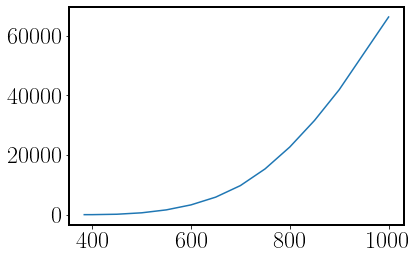

In [68]:
#Calculating the total Cerenkov light 
#(with considering absorption upto HWHM of the absorption plot-> treating no cerenkov emission upto respective wavelength i.e lambda_peak = 115.11 nm)

# t = 500 #K.E of Proton  in MeV
# t = np.array([10,20,50,100,200,250,300,400,500]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 

mp = 938  #Proton's mass in MeV
#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = 115.11 
lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

func = lambda wl,b: ((2 * np.pi * alpha) / (wl**2 )) * (1- (1/(b**2 * n_pvs(wl)*n_pvs(wl))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# t = np.array([10,20,50,100,200,250,300,400,500]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t = np.array([383.96156,385,400,450,500,550,600,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

cerenkovfinallist = []
cerenkovtsum = []
for j in t: 
    cerenkovtlist = []
    cerenkovsum = 0
#     print(j)
#     print(make_betalist(j))
    mybetalist = make_betalist(j)
    filtered_lst = [x for x in mybetalist if x > 0.7046534357]
#     print(filtered_lst)
    for i in filtered_lst:  #[0:20]
#         lmin = ((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2))))
#         lmax = ((2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2))))
#         print(lmin, lmax)
        if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) < 1:
            lmin = 115.11
            lmax = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
#             print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2))))
        if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) >= 1:
            lmin = 115.11
            lmax = np.inf
#             print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2))))
        no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(no_cerenkov_x[0])
        cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
        cerenkovsum += no_cerenkov_x[0]
        
    cerenkovfinallist.append(cerenkovtlist)
    cerenkovtsum.append(cerenkovsum * 1e6) #conversion factor to standard units
    
    
plt.plot(t, cerenkovtsum)
t, cerenkovtsum
    
# no_cerenkov_x
# n2_grace(100)
# make_betalist(500), 

# plt.plot(cerenkovnolist)
# cerenkovsum * 1e6
# lamdmax

In [69]:
# a_0 = 1.18416
# a_pvs = 0.000325985
# gamma = 0.000693652

# lamd_uv = 106.6 #lambda_UV = 106.6 nm
# lamd_ir = 908.3 #lambda_IR = 908.3 nm 

# alpha = 1/137
# #Formula: 
# n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))
# # n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2

# func = lambda wl,b: ((2 * np.pi * alpha) / (wl**2 )) * (1- (1/(b**2 * n_pvs(wl)*n_pvs(wl))))
# no_cerenkov_x = integrate.quad(func, 110, 139, args=(0.85,)) #Integral gives no of Cerenkov photons/nm 


# Angular dependence of Cerenkov radiation 

<font size = 4>
\begin{align}
    \frac{dN}{d\Omega} &= \alpha_{EM} \int_0^R dx \,
    \int_{\lambda_{min}}^{\lambda_{max}} \frac{d\lambda}{\lambda^2}
    \left( 1 - \frac{1}{\beta^2 n^2(\lambda)} \right)
    \delta( \cos\theta - \frac{1}{\beta n(\lambda)} )
    %
    \notag \\
    %
    \lambda_{min} &= 
    \begin{cases}
        \frac{2 \lambda_{UV} (a_0 \beta - 1)}{2 (a_0 \beta - 1) + \lambda_{UV} (a_{PVS} \beta - \sqrt{a^2_{PVS} \beta^2 - 4 (a_0 \beta - 1)^2 \Gamma^2}}
        & \mathrm{if} \qquad \beta \geq 1/n(\lambda_{peak})    \\
        \infty & \mathrm{else} 
    \end{cases}
    %
    \notag \\
    %
    \lambda_{max} &= 
    \begin{cases}
        \frac{2 \lambda_{UV} (a_0 \beta - 1)}{2 (a_0 \beta - 1) + \lambda_{UV} (a_{PVS} \beta + \sqrt{a^2_{PVS} \beta^2 - 4 (a_0 \beta - 1)^2 \Gamma^2}} 
        & \mathrm{if} \qquad a_0 + a_{PVS} 
        \left(\frac{\lambda_{UV}^{-1}}{\lambda_{UV}^{-2} + \Gamma^2} \right)  < 1/\beta   \\
        \infty & \mathrm{else} 
    \end{cases}
\end{align}

First, need to solve for when the delta function is satisfied:

\begin{align}
    \cos\theta = \frac{1}{\beta n(\lambda)}
\end{align}

Need to solve for $\lambda$ for given $\theta$.

\begin{align}
    n(\lambda) = a_0 + a_{PVS} \left( \frac{\lambda_{UV}^{-1} - \lambda^{-1}}{(\lambda_{UV}^{-1} - \lambda^{-1})^2 + \Gamma^2} 
    \right) = \frac{1}{\beta \cos\theta}
\end{align}

You will get

\begin{align}
    \frac{dN}{d\Omega} &= \alpha_{EM} \int_0^R dx \,
    \frac{1}{\lambda_\theta^2}
    \left( 1 - \frac{1}{\beta^2 n^2(\lambda_\theta)} \right)
    \frac{1}{\left| \frac{d}{d\lambda} (\cos\theta - \frac{1}{\beta n(\lambda)}) \right|}
\end{align}


In [ ]:
#Import necesary modules to run the code
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
import scipy
from scipy import integrate
from scipy import optimize
from scipy.optimize import fsolve